In [1]:
import asyncio
from aiohttp import web
import datetime
import matplotlib.pyplot as pl, IPython.display

In [2]:
async def handler(request):
    req=request.path[1:].split(",")
    payload = [(datetime.datetime.now()-start).seconds]
    [payload.append(int(s)) for s in req]
    tdat.append(payload[0])
    sdat.append(payload[1])
    if len(tdat) > 60:
        tdat.pop(0)
        sdat.pop(0)
        ax.set_xlim(min(tdat), max(tdat))
    lines.set_data(tdat,sdat)
    IPython.display.display(fig)
    IPython.display.clear_output(wait=True)
    return web.Response(text="OK")

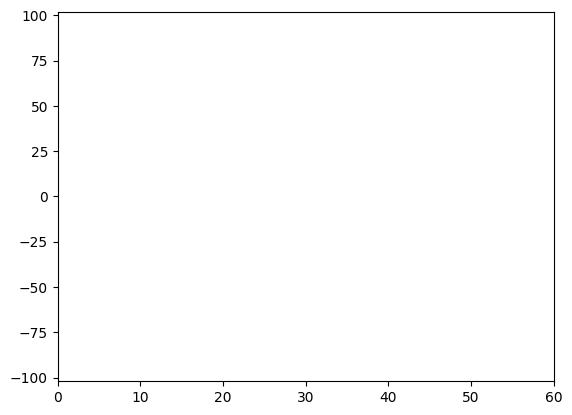

In [3]:
fig, ax = pl.subplots()
tdat = []
sdat = []
lines, = ax.plot([],[],"-ro")
ax.set_ylim(-102,102)
ax.set_xlim(0,60)
start = datetime.datetime.now()

async def main():
    server = web.Server(handler)
    runner = web.ServerRunner(server) 
    await runner.setup()
    site = web.TCPSite(runner, 'localhost', 8080, shutdown_timeout=10)
    await site.start()
    print("====== Serving on http://127.0.0.1:8080/ ======")

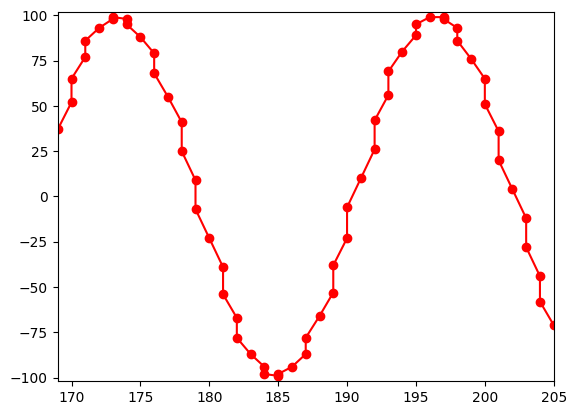

In [4]:
task = asyncio.create_task(main())
await task

In [11]:
L = asyncio.get_event_loop()

In [12]:
L.stop()